In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## **Defining the Problem Statement**

The aim here is to:


*   Clean, sanitize and manipulate data to get useful features out of raw fields.
*   Identify patterns and insights from the raw data to make sense out of it.
*   Perform feature engineering- extract valuable features from raw data, which can be utilized for building accurate forecasting models.
*   Perform hypothesis testing- to validate assumptions and draw insights from data.




## **Exploratory Data Analysis**

In [ ]:
# Reading the csv file
df = pd.read_csv("delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**The data contains 144867 rows and 24 columns.**

In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

**The data contains nulls in the columns 'source_name' and 'destination_name'.**

In [ ]:
# Checking for duplicate rows
df[df.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


**The data does not contain any duplicate row.**

In [ ]:
# Checking datatypes
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
# Number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


In [ ]:
# We check if there is a one-to-one relationship between 'source_name' and 'source_center'. For this, we can group df with one column and
# check if the count of unique values in each group is only one. If true, we know that the null values of the source_name are unique,
# and thus there's no need to drop them. We can simply fill them with 'source_center' itself.

print(df.drop_duplicates(['source_center', 'source_name']).groupby(['source_center'])['source_name'].count().max())
print(df.drop_duplicates(['source_center', 'source_name']).groupby(['source_name'])['source_center'].count().max())

1
1


**We see that each source_name has a unique value for a source_center and vice versa. Thus, we can fill the source_center values in the nulls of source_name column. The data will not have a language-interpretable meaning, but can be used for aggregated analysis.**

In [ ]:
# We check this for the destination_name as well

print(df.drop_duplicates(['destination_center', 'destination_name']).groupby(['destination_center'])['destination_name'].count().max())
print(df.drop_duplicates(['destination_center', 'destination_name']).groupby(['destination_name'])['destination_center'].count().max())

1
1


**The same stands true for destination_name and destination_address as well.**

In [ ]:
# Checking the proportion of null rows to the total rows
df.isnull().sum().sum() / df.shape[0]

0.0038241973672402964

**We could proceed with filling the source and destination names with their respective centers. But we will proceed with deleting the nulls as the nulls represent only 0.3% of the total rows and we can extract information from the source and destination names for further analysis.**

In [ ]:
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

In [ ]:
# Converting categorical data types into category and datetime to datetime
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')
df['is_cutoff'] = df['is_cutoff'].astype('category')

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## **Feature Extraction**

In [ ]:
# Creating new columns of states and cities from source_name and destination_name

df['source_name'] = df['source_name'].str.lower()
df['destination_name'] = df['destination_name'].str.lower()

def get_city(x):
    # Remove state
    city = x.split(' (')[0]
    city = city.split('_')[0]

    # Edge cases
    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'
    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'
    if city == 'hbr layout pc' :
        return 'bengaluru'
    if city == 'bhopal mp nagar' :
        return 'bhopal'
    if city == 'mumbai antop hill' :
        return 'mumbai'

    return city


def get_place(x):
    # Remove state
    x = x.split(' (')[0]
    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]

    return x.split(' ')[0]


def get_city_code(x):
    # Remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'


df['source_state'] = df['source_name'].str.split('(').str[1].str.strip(')')
df['source_city'] = df['source_name'].apply(lambda x: get_city(x))
df['source_place_in_city'] = df['source_name'].apply(lambda x: get_place(x))
df['source_city_code'] = df['source_name'].apply(lambda x: get_city_code(x))

df['destination_state'] = df['destination_name'].str.split('(').str[1].str.strip(')')
df['destination_city'] = df['destination_name'].apply(lambda x: get_city(x))
df['destination_place_in_city'] = df['destination_name'].apply(lambda x: get_place(x))
df['destination_city_code'] = df['destination_name'].apply(lambda x: get_city_code(x))

# Creating new columns of month and year from trip_creation_time

df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_day'] = df['trip_creation_time'].dt.day
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df['trip_creation_week'] = df['trip_creation_time'].dt.isocalendar().week
df['trip_creation_dayofweek'] = df['trip_creation_time'].dt.dayofweek

# Creating a new column to store the difference between od_start_time and od_end_time

df['od_diff_hours'] = (df['od_end_time'] - df['od_start_time']) / pd.Timedelta(hours=1)

# Creating a new column 'segment_key', to have a unique identifier for different segments of the trip

df['segment_key'] = df['trip_uuid'].astype(str) + '_' + df['source_center'].astype(str) + '_' + df['destination_center'].astype(str)

df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_place_in_city,destination_city_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_week,trip_creation_dayofweek,od_diff_hours,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,motvddpp,d,2018,9,20,2,38,3,1.436894,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,motvddpp,d,2018,9,20,2,38,3,1.436894,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,motvddpp,d,2018,9,20,2,38,3,1.436894,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,motvddpp,d,2018,9,20,2,38,3,1.436894,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,motvddpp,d,2018,9,20,2,38,3,1.436894,trip-153741093647649320_IND388121AAA_IND388620AAB


## **Aggregations of the Dataset**

In [ ]:
segment_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'trip_creation_year' : 'first',
    'trip_creation_month' : 'first',
    'trip_creation_day' : 'first',
    'trip_creation_hour' : 'first',
    'trip_creation_week' : 'first',
    'trip_creation_dayofweek' : 'first',

    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',
    'source_state' : 'first',
    'source_city' : 'first',
    'source_place_in_city' : 'first',
    'source_city_code' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',
    'destination_state' : 'last',
    'destination_city' : 'last',
    'destination_place_in_city' : 'last',
    'destination_city_code' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'od_diff_hours' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum'
}

segment = df.groupby('segment_key').agg(segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()
segment.head()

,index,segment_key,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_week,trip_creation_dayofweek,...,od_end_time,od_diff_hours,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,2018,9,12,0,37,2,...,2018-09-13 13:40:23.123744,21.010074,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,2018,9,12,0,37,2,...,2018-09-12 16:39:46.858469,16.658423,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,2018,9,12,0,37,2,...,2018-09-12 03:01:59.598855,0.980540,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,2018,9,12,0,37,2,...,2018-09-12 02:03:09.655591,2.046325,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,2018,9,12,0,37,2,...,2018-09-14 17:34:55.442454,13.910649,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [ ]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  category      
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   trip_creation_year              26222 non-null  int64         
 5   trip_creation_month             26222 non-null  int64         
 6   trip_creation_day               26222 non-null  int64         
 7   trip_creation_hour              26222 non-null  int64         
 8   trip_creation_week              26222 non-null  UInt32        
 9   trip_creation_dayofweek         26222 non-null  int64         
 10  route_schedule_uuid             26222 non-null  object        
 11  ro

In [ ]:
trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'trip_creation_year' : 'first',
    'trip_creation_month' : 'first',
    'trip_creation_day' : 'first',
    'trip_creation_hour' : 'first',
    'trip_creation_week' : 'first',
    'trip_creation_dayofweek' : 'first',

    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',
    'source_state' : 'first',
    'source_city' : 'first',
    'source_place_in_city' : 'first',
    'source_city_code' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',
    'destination_state' : 'last',
    'destination_city' : 'last',
    'destination_place_in_city' : 'last',
    'destination_city_code' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_diff_hours' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

}

trip = segment.groupby('trip_uuid').agg(trip_dict).reset_index(drop = True)
trip.head()

,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_week,trip_creation_dayofweek,route_schedule_uuid,route_type,...,destination_city_code,start_scan_to_end_scan,od_diff_hours,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,training,2018-09-12 00:00:16.535741,2018,9,12,0,37,2,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,...,6,2259.0,37.668497,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,2018,9,12,0,37,2,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,...,d,180.0,3.026865,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,2018,9,12,0,37,2,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,...,hb,3933.0,65.572709,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,2018,9,12,0,37,2,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,...,ip,100.0,1.674916,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,2018,9,12,0,37,2,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,...,d,717.0,11.972484,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [ ]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  category      
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   trip_creation_year              14787 non-null  int64         
 3   trip_creation_month             14787 non-null  int64         
 4   trip_creation_day               14787 non-null  int64         
 5   trip_creation_hour              14787 non-null  int64         
 6   trip_creation_week              14787 non-null  UInt32        
 7   trip_creation_dayofweek         14787 non-null  int64         
 8   route_schedule_uuid             14787 non-null  object        
 9   route_type                      14787 non-null  category      
 10  trip_uuid                       14787 non-null  object        
 11  so

In [ ]:
trip[['source_name', 'source_state', 'source_city', 'source_place_in_city', 'source_city_code']]

,source_name,source_state,source_city,source_place_in_city,source_city_code
0,kanpur_central_h_6 (uttar pradesh),uttar pradesh,kanpur,central,6
1,doddablpur_chikadpp_d (karnataka),karnataka,doddablpur,chikadpp,d
2,gurgaon_bilaspur_hb (haryana),haryana,gurgaon,bilaspur,hb
3,mumbai hub (maharashtra),maharashtra,mumbai hub,mumbai,none
4,bellary_dc (karnataka),karnataka,bellary,bellary,none
...,...,...,...,...,...
14782,chandigarh_mehmdpur_h (punjab),punjab,chandigarh,mehmdpur,h
14783,fbd_balabhgarh_dpc (haryana),haryana,fbd,balabhgarh,dpc
14784,kanpur_govndngr_dc (uttar pradesh),uttar pradesh,kanpur,govndngr,dc
14785,tirunelveli_vdkkusrt_i (tamil nadu),tamil nadu,tirunelveli,vdkkusrt,i


## **Feature Analysis**

In [ ]:
# Numerical columns
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance',
            'segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time', 'od_diff_hours']

<Axes: >

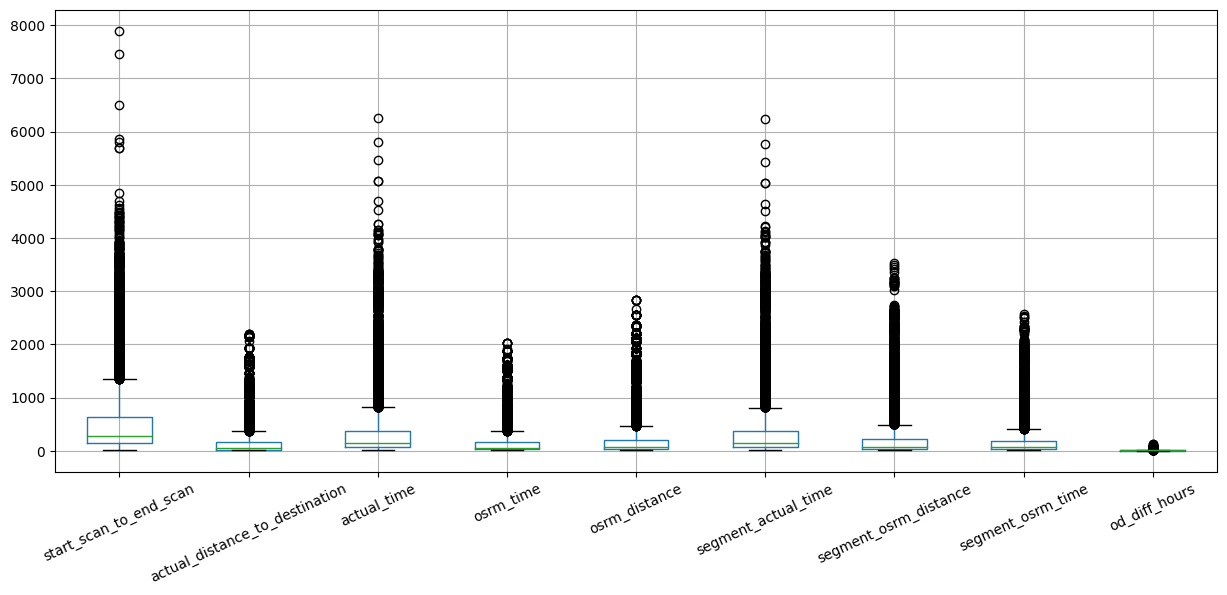

In [ ]:
# Visualizing the outliers
trip[num_cols].boxplot(rot=25, figsize=(15,6))

In [ ]:
# Removing the outliers- values that fall ouside the IQR
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

<Axes: >

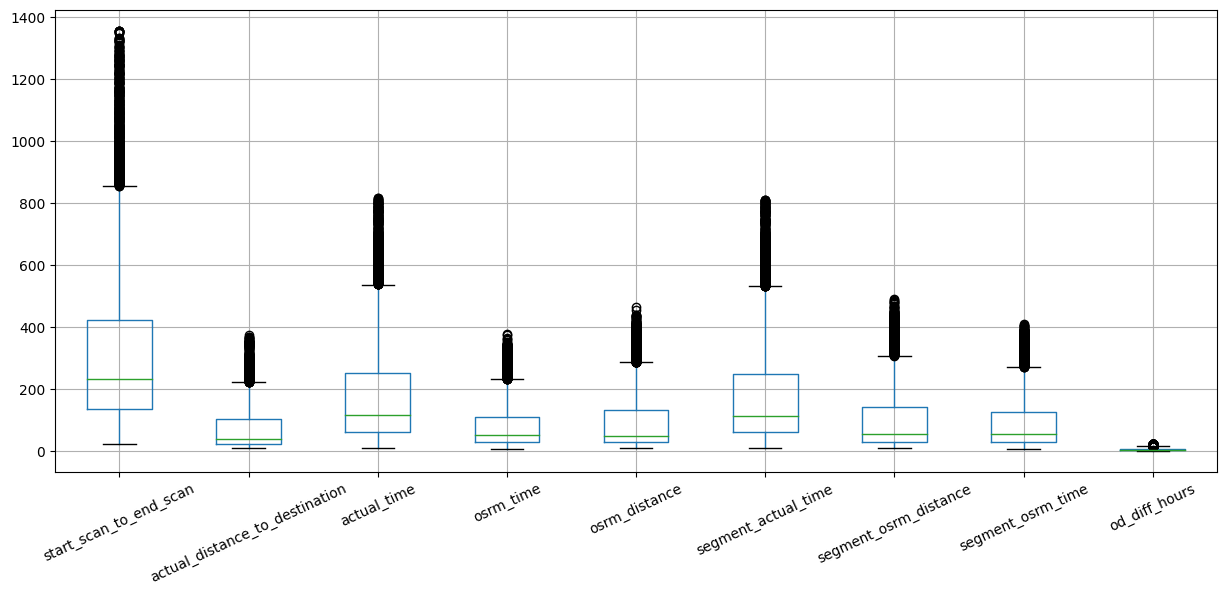

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(15,6))

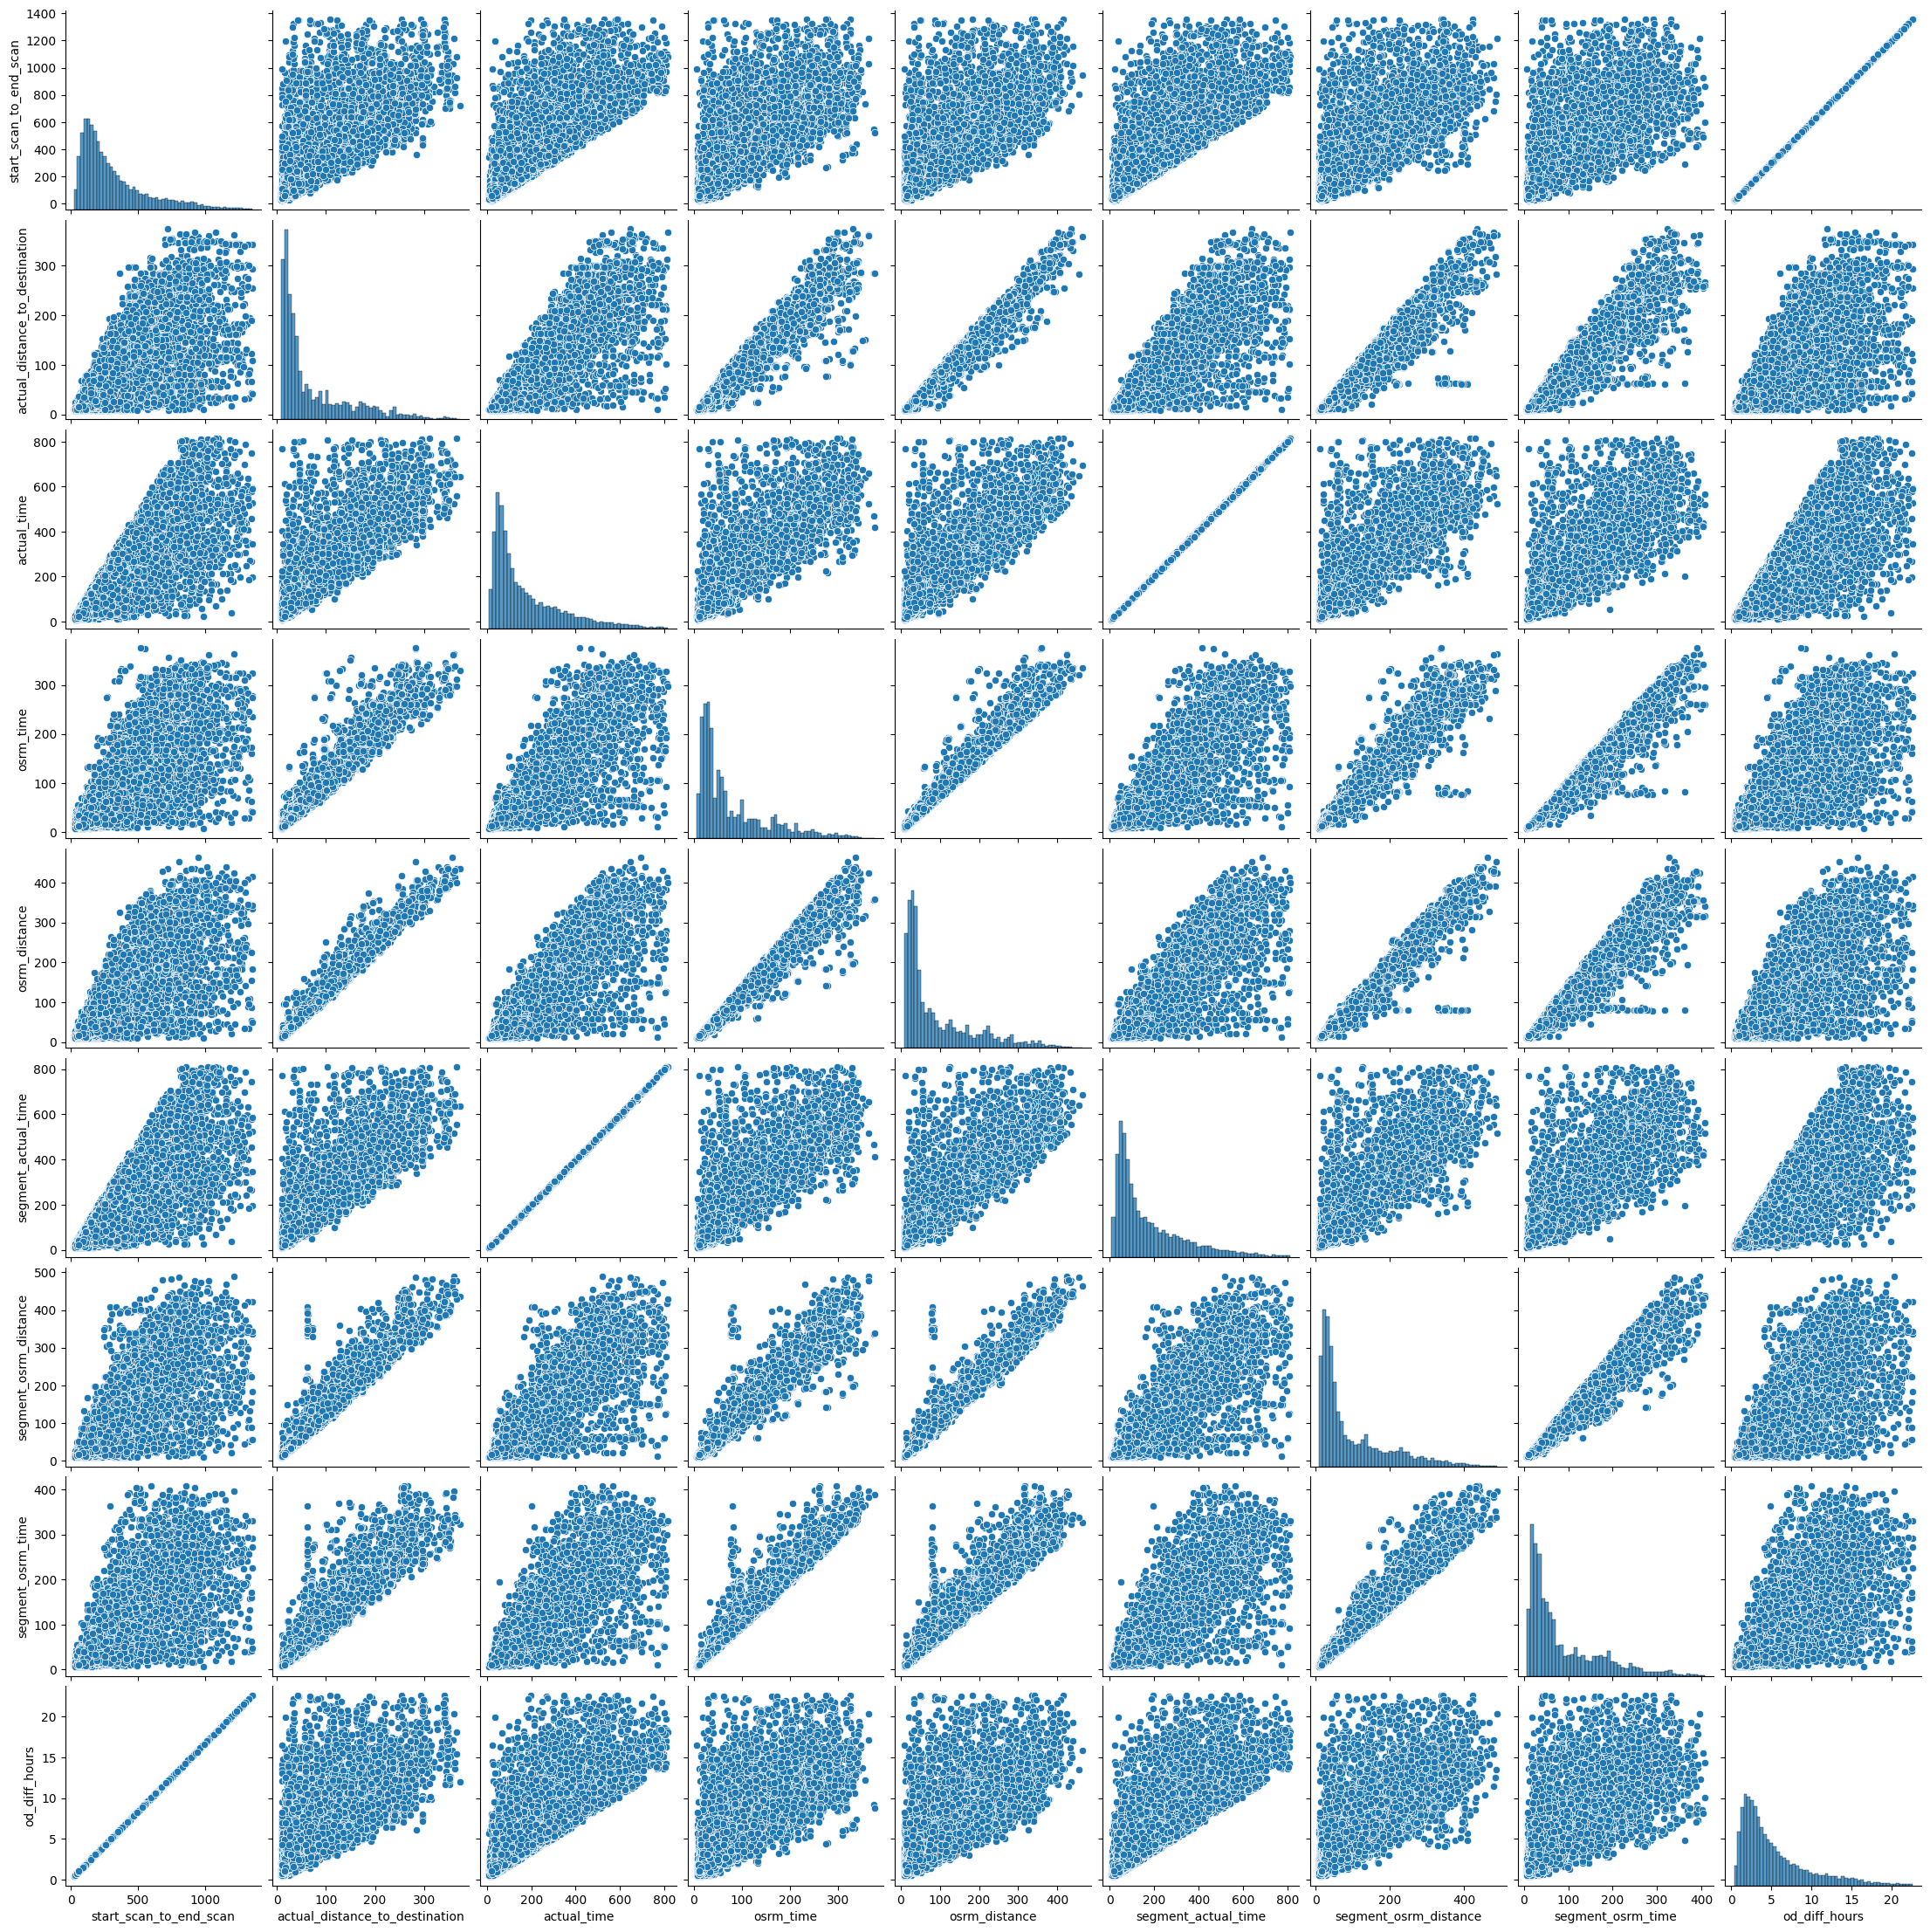

In [ ]:
sns.pairplot(trip[num_cols])

<Axes: >

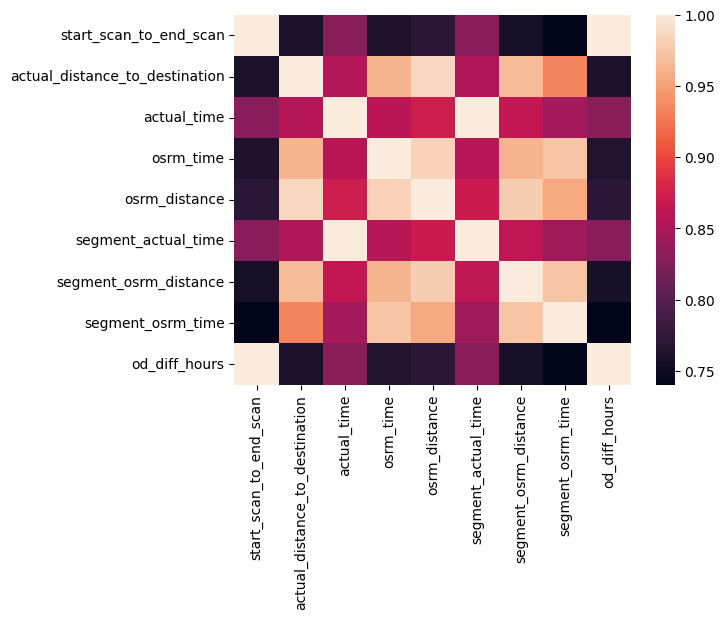

In [ ]:
sns.heatmap(trip[num_cols].corr())

**From the pairplots and the heatmap, we get the following insights:**

**1. The actual_time is heavily correlated to segment_actual_time.**

**2. start_scan_to_end_scan is nicely correlated to od_diff_hours.**

**3. segment_osrm_time and segment_osrm_distance are correlated.**

**4. segment_actual_time and segment_osrm_time are very lightly correlated.**



In [ ]:
# Finding the time span of the data
trip['trip_creation_time'].min(), trip['trip_creation_time'].max()

(Timestamp('2018-09-12 00:00:22.886430'),
 Timestamp('2018-10-03 23:59:42.701692'))

**The data spans from 2018-09-12 to 2018-10-03 which is approximately 1 month.**

In [ ]:
trip['data'].value_counts()

training    9097
test        3626
Name: data, dtype: int64

**The data is split in training and test in approximately 70-30 percentage.**

<Axes: xlabel='route_type', ylabel='count'>

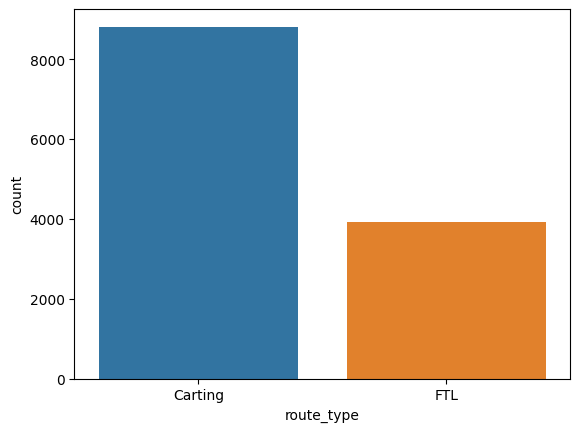

In [ ]:
# Checking the route types
sns.countplot(x = trip[['trip_uuid', 'route_type']].drop_duplicates()['route_type'])

**The company has more carting orders than FTL orders.**

In [ ]:
# Finding the number of cities in which Delhivery functions
len(set.intersection(set(df['source_city'].unique()),set(df['destination_city'].unique())))

1144

**The company's reach spans 1144 cities (unique sources + destinations).**

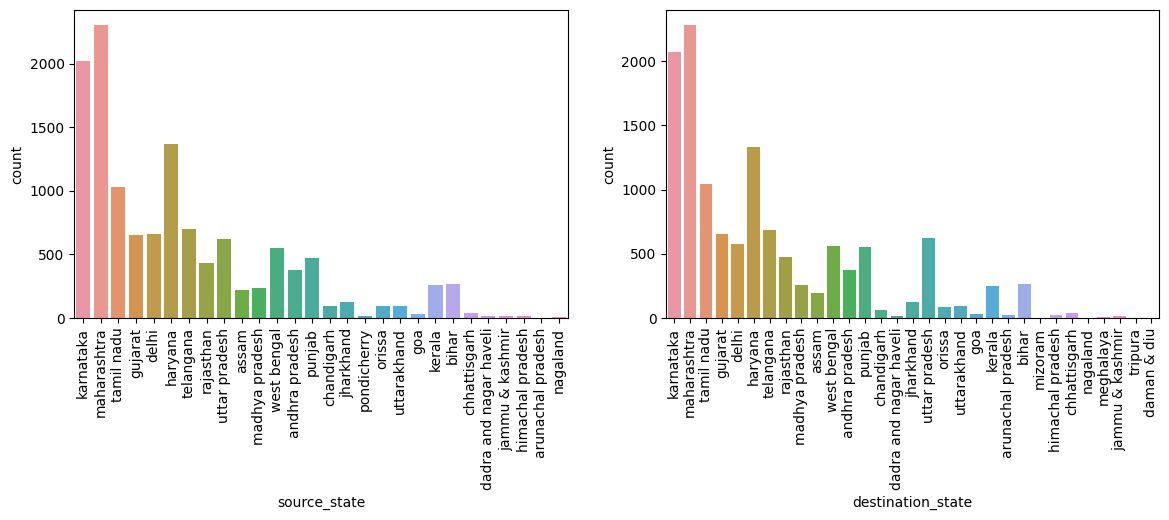

In [ ]:
# Looking at state-wise trip counts
f, axs = plt.subplots(1, 2, figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.countplot(x = trip[['trip_uuid', 'source_state']].drop_duplicates()['source_state']).tick_params(axis='x', rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x = trip[['trip_uuid', 'destination_state']].drop_duplicates()['destination_state']).tick_params(axis='x', rotation=90)

**Maharashtra, Karnataka and Haryana see both the most orders and the most deliveries. The company has little reach in the North-East states.**

In [ ]:
# Buisiest route
route_cnt = trip[['trip_uuid', 'source_name', 'destination_name']].groupby(['source_name', 'destination_name'])['trip_uuid'].count().reset_index(name='counts').sort_values(by='counts', ascending=False)
route_cnt

,source_name,destination_name,counts
158,bangalore_nelmngla_h (karnataka),bengaluru_kgairprt_hb (karnataka),151
221,bengaluru_bomsndra_hb (karnataka),bengaluru_kgairprt_hb (karnataka),121
240,bengaluru_kgairprt_hb (karnataka),bangalore_nelmngla_h (karnataka),108
303,bhiwandi_mankoli_hb (maharashtra),mumbai hub (maharashtra),105
1391,mumbai_chndivli_pc (maharashtra),bhiwandi_mankoli_hb (maharashtra),99
...,...,...,...
1148,khurdha_jatnidpp_d (orissa),bhubaneshwar_hub (orissa),1
1149,khurdha_munpldpp_d (orissa),bhubaneshwar_hub (orissa),1
1150,khurja_pnjbiyon_d (uttar pradesh),anupshahar_dcntcly_d (uttar pradesh),1
1153,kodinar_ncplxdpp_d (gujarat),una_mamlatdr_dc (gujarat),1


The busiest route is from bangalore warehouse to Bangalore airport, and the least used route falls in Rajasthan.

## **In-depth Analysis**

### **Comparison between od_diff_hours and start_scan_to_end_scan**

We have the difference between the start and end times of the delivery and total time taken to deliver. We do a hypothesis test (T-test) to check if the difference between the above values is statistically significant.

Ho : od_diff_hours = start_scan_to_end_scan

Ha : od_diff_hours != start_scan_to_end_scan

In [ ]:
# Hypothesis testing between od_diff_hours and start_scan_to_end_scan
tstat, p_value = ttest_ind(trip['od_diff_hours'], trip['start_scan_to_end_scan'], alternative = 'two-sided')

print("tstat: ", tstat)
print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
    print("od_diff_hours = start_scan_to_end_scan")
else :
    print("od_diff_hours != start_scan_to_end_scan")

tstat:  -138.93841499372655
p_value:  0.0
od_diff_hours != start_scan_to_end_scan


Since the two values are the same, we conclude that the waiting times of the deliveries is very less. Thus, the deliveries are efficient.

### **Comparison between actual_time and osrm_time**

We have actual time taken for the delivery and the computed time (osrm_time) with us. We do a hypothesis tes (T-test) to check if the difference between the calculated and the real values is statistically significant.

Ho : The calculated and the actual times are the same. (actual_time = osrm_time)

Ha : The actual time taken is more than the calculated time. (actual_time > osrm_time)

In [ ]:
# Hypothesis testing between actual_time and osrm_time
tstat, p_value = ttest_ind(trip['actual_time'], trip['osrm_time'], alternative = 'greater')

print("tstat: ", tstat)
print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
    print("The calculated and the actual times are the same.")
else :
    print("The actual time taken is more than the calculated time.")

tstat:  64.2193495364768
p_value:  0.0
The actual time taken is more than the calculated time.


We see that the actual time is significantly more than the calculated time. This means that there is a lot of scope for the computational method to improve to the real-case scenario.

### **Comparison between actual_time and segment_actual_time**

We have the times taken for the complete delivery and for all the segments. We do a hypothesis tes (T-test) to check if the difference between the two values is statistically significant.

Ho : The total and the segment times are the same. (actual_time = segment_actual_time)

Ha : The total time taken is more than the segment times of all the segments. (actual_time > segment_actual_time)


In [ ]:
# Hypothesis testing between actual_time and segment_actual_time
tstat, p_value = ttest_ind(trip['actual_time'], trip['segment_actual_time'], alternative = 'greater')

print("tstat: ", tstat)
print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
    print("The total and the segment times are the same.")
else :
    print("The total time taken is more than the segment times of all the segments.")

tstat:  0.8381648951065266
p_value:  0.20097298669210112
The total and the segment times are the same.


The total time and the segment times are similar, this means that there is little to no waiting time for the deliverables once they are picked up.

### **Comparison between osrm_distance and segment_osrm_distance**


We have the calculated distance for the complete delivery and for all the segments. We do a hypothesis tes (T-test) to check if the difference between the two values is statistically significant.

Ho : The computed and the actual segment are the same. (osrm_distance = segment_osrm_distance)

Ha : The computed and the actual segment are different. (osrm_distance != segment_osrm_distance)


In [ ]:
# Hypothesis testing between osrm_distance and segment_osrm_distance
tstat, p_value = ttest_ind(trip['osrm_distance'], trip['segment_osrm_distance'], alternative = 'two-sided')

print("tstat: ", tstat)
print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
    print("The computed and the actual segment are the same.")
else :
    print("The computed and the actual segment are different.")

tstat:  -5.394101351961479
p_value:  6.948130323916274e-08
The computed and the actual segment are different.


We see that the actual distance is significantly more than the calculated one. This means that there is a lot of scope for the computational method to improve to the real-case scenario.

### **Comparison between osrm_time and segment_osrm_time**

We have the calculated times for the complete delivery and for all the segments. We do a hypothesis tes (T-test) to check if the difference between the two values is statistically significant.

Ho : The calculated times for the whole trip and for its segments are the same. (osrm_time = segment_osrm_time)

Ha : The calculated times for the whole trip and for its segments are different. (osrm_time != segment_osrm_time)


In [ ]:
# Hypothesis testing between osrm_time and segment_osrm_time
tstat, p_value = ttest_ind(trip['osrm_time'], trip['segment_osrm_time'], alternative = 'greater')

print("tstat: ", tstat)
print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
    print("The calculated times for the whole trip and for its segments are the same.")
else :
    print("The calculated times for the whole trip and for its segments are different.")

tstat:  -7.8316261870167665
p_value:  0.9999999999999976
The calculated times for the whole trip and for its segments are the same.


The calculated times for the whole trip and for its segments are similar. Thus, the calculations itself doesn't have any ambiguities.

## **Handling Categorical Values**

In [ ]:
trip['route_type'].value_counts()

Carting    8812
FTL        3911
Name: route_type, dtype: int64

In [ ]:
# Since there are only two route types, we do One-hot encoding
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})
trip.head()

,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_week,trip_creation_dayofweek,route_schedule_uuid,route_type,...,destination_city_code,start_scan_to_end_scan,od_diff_hours,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,training,2018-09-12 00:00:22.886430,2018,9,12,0,37,2,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,...,d,180.0,3.026865,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
1,training,2018-09-12 00:01:00.113710,2018,9,12,0,37,2,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,...,ip,100.0,1.674916,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
2,training,2018-09-12 00:02:09.740725,2018,9,12,0,37,2,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,...,d,717.0,11.972484,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
3,training,2018-09-12 00:02:34.161600,2018,9,12,0,37,2,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,...,none,189.0,3.174797,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0
4,training,2018-09-12 00:04:22.011653,2018,9,12,0,37,2,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,...,dc,98.0,1.633427,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0


We skip encoding is_cutoff since it is an unknown field.

## **Standardization of numerical features**

In [ ]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

trip[num_cols] = scaler.transform(trip[num_cols])

trip[num_cols].head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_diff_hours
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585


In [ ]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_diff_hours
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,-8.488760e-17,6.031487e-17,-1.870878e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,-1.162915e+00
25%,-7.207269e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,-7.210516e-01
50%,-3.411472e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,-3.418602e-01
75%,4.023595e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,4.020802e-01
max,4.049455e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,4.050310e+00


## **Insights**



1.   The company has more carting orders than FTL orders.
2.   The company's reach spans 1144 cities (unique sources + destinations).
3.   Maharashtra, Karnataka and Haryana see the most orders and deliveries. The company has little reach in the North-East states. Thus, there lies a huge potential for the company in the states where its growth is not proportional to the population.
4.   The busiest route is from Bangalore warehouse to Bangalore airport, and the least used route falls in Rajasthan.
5.   The calculated and the actual values in all the comparisons made vary greatly. The actual times and distances are both different from the calculated ones.
6.   The total time and the segment times are similar, meaning there is little to no waiting time for the deliverables once they are picked up.

## **Recommendations**



1.   The computations for the trip planning need to be improved. Any ambiguities or probability of unexpected events should be considered to have better results.
2.   Maharashtra, Karnataka and Haryana see the most orders and deliveries. Thus, routes corresponding to these states are sensitive to the working of the company. They should be monitored well and
3.   There lies a huge potential for the company in the states where its growth is not proportional to the population, like UP, Bihar, Orissa, MP etc. The presence in the North-East states and the UTs could also be improved.